## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [24]:
import pandas as pd
df = pd.read_csv('/content/cleaned_ecommerce_dataset.csv')

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [18]:
df.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.

  Hints: To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [19]:
#Using method head() and info() to find how many colums and the data types of each column
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
df = pd.read_csv('/content/cleaned_ecommerce_dataset.csv')
#Convert catergorical features to numerical values
catergorical_features = ['gender','category','review']
encoder = OrdinalEncoder()
df[catergorical_features]=encoder.fit_transform(df[catergorical_features])
print(df.head())
print(df.info())



   userId  timestamp  review                                item  rating  \
0    4081      71900  1618.0                          McDonald's     4.0   
1    4081      72000  1125.0                           Taco Bell     1.0   
2    4081      72000  2185.0                             Wendy's     5.0   
3    4081     100399  2243.0  South Park: Bigger, Longer & Uncut     5.0   
4    4081     100399  1033.0                        American Pie     3.0   

   helpfulness  gender  category  item_id  item_price  user_city  
0          3.0     1.0       8.0       41       30.74          4  
1          4.0     1.0       8.0       74      108.30          4  
2          4.0     1.0       8.0       84       69.00          4  
3          3.0     1.0       5.0       68      143.11          4  
4          3.0     1.0       5.0        6      117.89          4  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  

In [20]:
#Correlation
correlation_matrix = df.corr() #calculate the correlation coefficients between numerics column in Dataframe
rating_correlation = correlation_matrix['rating'].sort_values(ascending=False) #sperate out the correlations related 'rating' and sorts the from highest to lowest
print("Correlation with ratings:")
print(rating_correlation)
most_correlation_features = rating_correlation.head(2) #select top two highest correlation values
least_correlated_features = rating_correlation.tail(2) # select bottom two lowest correlation values
print("\nMost correlated features with ratings:")
print("\nLeast correlated features with rating:")



Correlation with ratings:
rating         1.000000
item_id        0.042890
userId         0.032506
item_price     0.027374
timestamp      0.000369
helpfulness   -0.007523
user_city     -0.028825
gender        -0.034337
review        -0.036118
category      -0.163158
Name: rating, dtype: float64

Most correlated features with ratings:

Least correlated features with rating:


<ipython-input-20-fe5d2c444aaa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr() #calculate the correlation coefficients between numerics column in Dataframe


from figure out of correlation with rating shows most correlated are item_id(0.042890) and user_id(0.032506) suggest that they maybe useful for predicting product of service rating in train a regression model.
- user_id this demonstrates individual rating behavior, some user satify with products and some user not. Predictions could improve by recognizing the rating patterns of specific users.
- item_id and rating are correlated suggest that the specific products may consistenly receive similar ratings. For instance some products may consistenly obtain high ratings due to quality issue or popularity. On  the other hand some procuct receive low ratings due to quality issues or perception. item_id in the training data could help the model recognize the specific characteristics of each product that effect rating.
Least correlated are category(-0.163158) and review(-0.036118) are a negative correlation coefficient in correlation analysis which means there is an inverse relationship between two variables as one variable increases, the other decreases
- If category or review has a negative correlation with rating, the predic result will show as the values of category or review increase, the expected rating decrease.




### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features from helpfulness/gender/category/review regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

most_correlated_features = ['item_id', 'userId']
least_correlated_features = ['category', 'review']
# Splitting the dataset into features (X) and target (y)
X_most_correlated = df[most_correlated_features]
X_least_correlated = df[least_correlated_features]
y = df['rating']

# Case 1 split (e.g., 80% training, 20% testing)
X_train_most_80, X_test_most_80, y_train_80, y_test_80 = train_test_split(X_most_correlated, y, test_size=0.2, random_state=42)
X_train_least_80, X_test_least_80, _, _ = train_test_split(X_least_correlated, y, test_size=0.2, random_state=42)

# Case 2 split (e.g., 60% training, 40% testing)
X_train_most_60, X_test_most_60, y_train_60, y_test_60 = train_test_split(X_most_correlated, y, test_size=0.4, random_state=42)
X_train_least_60, X_test_least_60, _, _ = train_test_split(X_least_correlated, y, test_size=0.4, random_state=42)

# Function to train and evaluate a model
def train_and_evaluate(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    return mse, rmse, r2

# Training and evaluating models
mse_a, rmse_a, r2_a = train_and_evaluate(X_train_most_80, X_test_most_80, y_train_80, y_test_80)  # Model A
mse_b, rmse_b, r2_b = train_and_evaluate(X_train_least_80, X_test_least_80, y_train_80, y_test_80)  # Model B
mse_c, rmse_c, r2_c = train_and_evaluate(X_train_most_60, X_test_most_60, y_train_60, y_test_60)  # Model C
mse_d, rmse_d, r2_d = train_and_evaluate(X_train_least_60, X_test_least_60, y_train_60, y_test_60)  # Model D

# Printing the results
print(f"Model A - MSE: {mse_a}, RMSE: {rmse_a}, R^2: {r2_a}")
print(f"Model B - MSE: {mse_b}, RMSE: {rmse_b}, R^2: {r2_b}")
print(f"Model C - MSE: {mse_c}, RMSE: {rmse_c}, R^2: {r2_c}")
print(f"Model D - MSE: {mse_d}, RMSE: {rmse_d}, R^2: {r2_d}")


Model A - MSE: 1.7678673329484802, RMSE: 1.3296117226275046, R^2: -0.004532303447541297
Model B - MSE: 1.719731167316296, RMSE: 1.3113852093554723, R^2: 0.022819485026871145
Model C - MSE: 1.780689366968038, RMSE: 1.3344247325975482, R^2: -0.0020242860041888022
Model D - MSE: 1.733373684540573, RMSE: 1.3165765015906112, R^2: 0.024601055720577247


### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [22]:
# the evaluation has already been done within the train_and_evaluate function,
# and mse (Mean Squared Error) and rmse (Root Mean Squared Error) values are returned.

mse_a, rmse_a, _ = train_and_evaluate(X_train_most_80, X_test_most_80, y_train_80, y_test_80)  # Model A
mse_b, rmse_b, _ = train_and_evaluate(X_train_least_80, X_test_least_80, y_train_80, y_test_80)  # Model B
mse_c, rmse_c, _ = train_and_evaluate(X_train_most_60, X_test_most_60, y_train_60, y_test_60)  # Model C
mse_d, rmse_d, _ = train_and_evaluate(X_train_least_60, X_test_least_60, y_train_60, y_test_60)  # Model D

# Printing the results
print("Model A - MSE: {:.4f}, RMSE: {:.4f}".format(mse_a, rmse_a))
print("Model B - MSE: {:.4f}, RMSE: {:.4f}".format(mse_b, rmse_b))
print("Model C - MSE: {:.4f}, RMSE: {:.4f}".format(mse_c, rmse_c))
print("Model D - MSE: {:.4f}, RMSE: {:.4f}".format(mse_d, rmse_d))


Model A - MSE: 1.7679, RMSE: 1.3296
Model B - MSE: 1.7197, RMSE: 1.3114
Model C - MSE: 1.7807, RMSE: 1.3344
Model D - MSE: 1.7334, RMSE: 1.3166


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

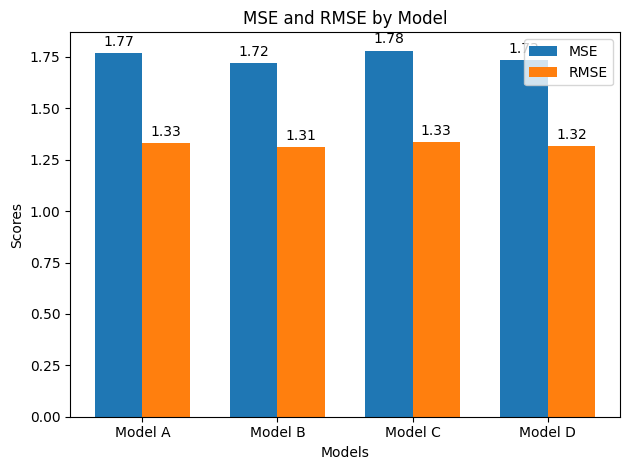

In [23]:
import matplotlib.pyplot as plt
import numpy as np

mse_values = [mse_a, mse_b, mse_c, mse_d]
rmse_values = [rmse_a, rmse_b, rmse_c, rmse_d]
model_labels = ['Model A', 'Model B', 'Model C', 'Model D']

# Creating the bar plots
x = np.arange(len(model_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mse_values, width, label='MSE')
rects2 = ax.bar(x + width/2, rmse_values, width, label='RMSE')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('MSE and RMSE by Model')
ax.set_xticks(x)
ax.set_xticklabels(model_labels)
ax.legend()

# to attach a text label above each bar, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


### Data Science Ethics
*Please read the following examples [Click here to read the example_1.](https://www.vox.com/covid-19-coronavirus-us-response-trump/2020/5/18/21262265/georgia-covid-19-cases-declining-reopening) [Click here to read the example_2.](https://viborc.com/ethics-and-ethical-data-visualization-a-complete-guide/)

*Then view the picture ![My Image](figure_portfolio2.png "This is my image")
Please compose an analysis of 100-200 words that evaluates potential ethical concerns associated with the infographic, detailing the reasons behind these issues.


The infographics from the 2008 Summer Olympics, comparing total medal counts and gold medals, raise ethical considerations. An ethical issue that we should consider is presenting of gold medals and total medals may lead to different interpretations of country’s performance. Sorting medals by gold could imply a greater value is attached to them, potentially overshadowing the accomplishments represented by silver and bronze medals. This situation might affect athletes from nations that have secured a large number of total medals but fewer golds, possibly leading to an unfair view of their achievements. Another important ethical aspect to consider is the data's accuracy and origin. Inaccuracies in the infographic or reliance on untrustworthy sources could mislead or misinform viewers. It's critical to verify that the data is accurate and that the sources are reputable to uphold honesty and trust. Additionally, the employment of national flags for representation needs to be approached with care. Flags can trigger intense feelings of patriotism, and their application in leaderboards could cause disputes or discomfort if it's interpreted as a ranking of countries themselves, rather than their performance in the Olympics. The context in which the infographic is displayed also plays a vital role.